# Retail Customer Analysis 

#### This Script does 
Exploratory Data Analysis (EDA)

EDA tools seek to identify patterns within datasets by emphasizing graphics.Sometimes even the things we see with our naked eyes is not the “naked” truth. It needs time,conviction and certainty to get behind the truth. EDA — Exploratory Data Analysis - does this for Machine Learning enthusiast. It is a way of visualizing, summarizing and interpreting the information that is hidden in rows and column format. EDA is one of the crucial step in data science that allows us to achieve certain insights and statistical measure that is essential for the business continuity, stockholders and data scientists. It performs to define and refine our important features variable selection, that will be used in our model.
Once EDA is complete and insights are drawn, its feature can be used for supervised and unsupervised machine learning modelling. The EDA is executed majorly by Uni-variate visualization, Bi-variate visualization, Multivariate Visualization and Dimensionality reduction.
We initially make several hypothesis by looking at the data before we hit the modelling. And its quite a good practice cause that will engage you more with EDA part. EDA helps you in confirming and validating the hypothesis you make. And from here you start your feature engineering part and take a flight to machine learning modelling.

.

In [1]:
## Import Required Libraries
import pandas as pd
print(f'pandas: {pd.__version__}') # Printing the version of pandas

import numpy as np
print(f'numpy: {np.__version__}') # Printing the version of Numpy

import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot

pandas: 0.25.1
numpy: 1.16.5


In [2]:
# warnings.filterwarnings("ignore")
plt.rcParams["patch.force_edgecolor"] = True
plt.style.use('fivethirtyeight')
# mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
%matplotlib inline

In [3]:
# Read Data from Excel Sheet
# Data read - All Required data  are in datafolder
data_folder = "F:/BitsCourse/CapStoneProject/Retail_Customer_Analytics/2019AIML012"
client_review = data_folder+"/client_review"

retailDataFrame = pd.read_excel(data_folder+"/input_files/1-Capstone_Customer_Retail_AnalyticsRaw_Data.xlsx")

print('Retail Data dimensions:', retailDataFrame.shape)

Retail Data dimensions: (530210, 11)


In [4]:
# Top five rows
retailDataFrame.head(5)

,InvoiceNo,ItemCode,item_Desc,Quantity,InvoiceDate,UnitPrice,CustomerID,CustomerName,Country,StoreLocation,LOAD_DT
0,536365,10742201412,Microclimate Headband-Black/Black,6,2010-12-01 08:26:00,2.55,17850.0,Matthew-Clark,Argentina.,NaN,2016-07-10
1,536365,10742201610,Microclimate Headband-Blazing Orange/Charcoal,6,2010-12-01 08:26:00,3.39,17850.0,Matthew-Clark,Argentina.,NaN,2016-07-10
2,536365,10742201719,Microclimate Headband-Coral Rose/Charcoal,8,2010-12-01 08:26:00,2.75,17850.0,Matthew-Clark,Argentina.,NaN,2016-07-10
3,536365,10742201818,SF-2 LS-Small,6,2010-12-01 08:26:00,3.39,17850.0,Matthew-Clark,Argentina.,NaN,2016-07-10
4,536365,10742202211,SF-2 LS-Medium,6,2010-12-01 08:26:00,3.39,17850.0,Matthew-Clark,Argentina.,NaN,2016-07-10


## Function to plot Line Graph

In [5]:
def plotMyLineGraph(x,y,title,xlabel,ylabel):
    plt.rcParams["figure.figsize"] = (10,5)
    plt.plot(x, y)
    plt.xticks(x,rotation='vertical')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    
    plt.show()

## Function to plot Bar Graph

In [6]:
def plotMyBarGraph (x,y,title,xlabel,ylabel):
    plt.rcParams["figure.figsize"] = (10,5) #Specifies the size of plot
    plt.bar(np.arange(len(x)), y, align='center', alpha=0.7)
    plt.xticks(np.arange(len(x)), x)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title)

    plt.show()

## Function to find missing values in each column

In [7]:
def findMissingValuesInData(df):
        missingValue = df.isnull().sum()
        missingValuePercent = 100 * missingValue / len(df)
        missingValueTable = pd.concat([missingValue, missingValuePercent], axis=1)
        renamedColumnsOfTable = missingValueTable.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        renamedColumnsOfTable = renamedColumnsOfTable[renamedColumnsOfTable.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(6)
        print ("Retail Data has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(renamedColumnsOfTable.shape[0]) +
              " columns that have missing values.")
        return renamedColumnsOfTable

## Function to remove Outliers

In [8]:
def removeOutlier(df, colName):
    df = df.copy(deep=True)
    descData = df.describe()
    q1 = descData[colName]["25%"]
    q3 = descData[colName]["75%"]
    iqr = q3-q1 #Interquartile range
    fenceLow  = q1-1.5*iqr                                                                
    fenceHigh = q3+1.5*iqr
    print(colName , " low : " , fenceLow , " high : " , fenceHigh , "\n")
    df.drop(df[df[colName] < fenceLow].index, inplace = True)
    df.drop(df[df[colName] > fenceHigh].index, inplace = True)
    return df;

## Find missing values in the data

In [9]:
columnsWiseMissingValue = findMissingValuesInData(retailDataFrame) 
print(columnsWiseMissingValue)

Retail Data has 11 columns.
There are 4 columns that have missing values.
               Missing Values  % of Total Values
StoreLocation          530175          99.993399
LOAD_DT                372463          70.248204
CustomerID             133840          25.242828
CustomerName               14           0.002640


In [10]:
retailDataFrame.columns

Index(['InvoiceNo', 'ItemCode', 'item_Desc', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'CustomerName', 'Country', 'StoreLocation',
       'LOAD_DT'],
      dtype='object')

# Preprocess Retail Customer Data
## Find Max & Min InvoiceDate

In [11]:
retailDataFrame.dtypes

InvoiceNo                 int64
ItemCode                  int64
item_Desc                object
Quantity                  int64
InvoiceDate      datetime64[ns]
UnitPrice               float64
CustomerID              float64
CustomerName             object
Country                  object
StoreLocation            object
LOAD_DT          datetime64[ns]
dtype: object

Its a Retail Store data over a period of time, we checked minimum and maximum of Invoice Date, to understand time period we are looking at.  

In [12]:
minInvoiceDate =  retailDataFrame.InvoiceDate.min()
maxInvoiceDate = retailDataFrame.InvoiceDate.max()
print ("Minimum Invoice Date : ", minInvoiceDate)
print ("Maximum Invoice Date : ", maxInvoiceDate)

Minimum Invoice Date :  2010-12-01 08:26:00
Maximum Invoice Date :  2011-12-09 12:50:00


## Remove spaces from "item_Desc" column

In [13]:
processedDataFrame = retailDataFrame.copy(deep=True)

processedDataFrame['item_Desc'] = processedDataFrame['item_Desc'].str.strip()
print('Dataframe dimensions:', processedDataFrame.shape)

Dataframe dimensions: (530210, 11)


### Collect data in different files to further communicate with Client.

In [14]:
# Save the reords where CustomerIds are null in different file to communicate with Client, These records will be removed from dataframe.
null_customerids = processedDataFrame[processedDataFrame["CustomerID"].isnull()]
print (f'{len(null_customerids)} Records found where Customer Id is null, saved in File\n{client_review}/nullCustomerIdRecords.csv\nfor further Communication with Client.\n\n\n')
null_customerids.to_csv(client_review + "/nullCustomerIdRecords.csv",index=False)


# Save the reords where Unit Price is zero in different file to communicate with Client, These records will be removed from dataframe.
unitPrice_Zero_Records = processedDataFrame[processedDataFrame.UnitPrice == 0]
print (f'{len(unitPrice_Zero_Records)} Records found where Unit Price is zero, saved in File\n{client_review}/unitPriceZeroRecords.csv\nfor further Communication with Client.\n\n\n')
unitPrice_Zero_Records.to_csv(client_review + "/unitPriceZeroRecords.csv",index=False)


# Save the reords where Customer Name is Null in different file to communicate with Client, These records will be imputed with "Others".
null_customer_names = processedDataFrame[processedDataFrame["CustomerName"].isnull()]
print (f'{len(null_customer_names)} Records found where Customer Name is Null, saved in File\n{client_review}/nullCustomerNames.csv\nfor further Communication with Client.\n\n\n')
null_customer_names.to_csv(client_review + "/nullCustomerNames.csv",index=False)

133840 Records found where Customer Id is null, saved in File
F:/BitsCourse/CapStoneProject/Retail_Customer_Analytics/2019AIML012/client_review/nullCustomerIdRecords.csv
for further Communication with Client.



2485 Records found where Unit Price is zero, saved in File
F:/BitsCourse/CapStoneProject/Retail_Customer_Analytics/2019AIML012/client_review/unitPriceZeroRecords.csv
for further Communication with Client.



14 Records found where Customer Name is Null, saved in File
F:/BitsCourse/CapStoneProject/Retail_Customer_Analytics/2019AIML012/client_review/nullCustomerNames.csv
for further Communication with Client.





## Remove null values from "CustomerID" column as it is not feasible to impute

For  missing values of "CustomerID", which is String type Nminal data, but can NOT impute with some single value. Reason is, available data is Transaction data done by diffrent Customers, having unique Customer Id to identify, If we Impute missing values of "CustomerID" with some single value, lets say "123", Model will get train as there is Single Customer with Customer Id 123 who did all transactions, which is not Correct. Hence We have to remove all those Records from Dataset where Customer Id is missing. 

In [15]:
processedDataFrame = processedDataFrame.dropna(subset=['CustomerID'])
print('Dataframe dimensions:', processedDataFrame.shape)

Dataframe dimensions: (396370, 11)


## Delete all rows with "UnitPrice" column value equal to zero

We also found few rows where Unit Proce is Zero, which will result in Revenue from those transaction as Zero. Moreover it looks like Error in data gathering as We can not have a Transaction Record with Unit Price as Zero. We can not Impute this featue, as it might affect model training negatively by increasing False Postive and False Negative. Hence dropping all those records where Unit Price is Zero.

In [16]:
processedDataFrame.drop(processedDataFrame[processedDataFrame.UnitPrice == 0].index, inplace=True)
print('Dataframe dimensions:', processedDataFrame.shape)

Dataframe dimensions: (396337, 11)


## Drop "StoreLocation" & "LOAD_DT" Columns

In [17]:
columnsWiseMissingValue = findMissingValuesInData(processedDataFrame) 
print(columnsWiseMissingValue)


Retail Data has 11 columns.
There are 3 columns that have missing values.
               Missing Values  % of Total Values
StoreLocation          396302          99.991169
LOAD_DT                286962          72.403535
CustomerName               14           0.003532


Here we still see 3 Columns with Empty / missing data. Assuming, 70% of data is Threshold to accept any feature as Usefull data for further analysis, i.e. any feature / column has values empty / missing more than 30% are not feasible to process with, hence we have to Drop Column "StoreLocation" and "LOAD_DT" from dataset. For remaining feture from above table i.e. "CustomerName" we will employ Imputation technique.

In [18]:
processedDataFrame = processedDataFrame.drop(columns=['StoreLocation', 'LOAD_DT'])
print('Dataframe dimensions:', processedDataFrame.shape)

Dataframe dimensions: (396337, 9)


In [19]:
columnsWiseMissingValue = findMissingValuesInData(processedDataFrame) 
print(columnsWiseMissingValue)

Retail Data has 9 columns.
There are 1 columns that have missing values.
              Missing Values  % of Total Values
CustomerName              14           0.003532


## Impute missing values of column "CustomerName" with the value "others"

For missing values of "CustomerName", which is String type, Nominal data, we will impute them with String "Others"

In [20]:
processedDataFrame['CustomerName'] = processedDataFrame['CustomerName'].fillna('others')
print('Dataframe dimensions:', processedDataFrame.shape)

#Check if there exist anymore columns with missing data 
columnsWiseMissingValue = findMissingValuesInData(processedDataFrame) 
print(columnsWiseMissingValue)

Dataframe dimensions: (396337, 9)
Retail Data has 9 columns.
There are 0 columns that have missing values.
Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []


Thus we clear all missing value from available data.

## Find Countries from which orders are made 

In [21]:
countries = processedDataFrame.Country.unique()
print(f"Total {len(countries)} countries, doing business.")
countries

Total 36 countries, doing business.


array(['Argentina.', 'Australia', 'Austria', 'Bahrain', 'Belgium',
       'Canada', 'Croatia', 'Denmark', 'Finland', 'France', 'Germany',
       'Greece', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq',
       'Ireland', 'Israel', 'Italy', 'Japan', 'Luxembourg', 'Mexico',
       'Monaco', 'N Zealand', 'Netherlands', 'Norway', 'Poland',
       'Portugal', 'S Korea', 'Spain', 'Sweden', 'Switzerland', 'UK',
       'USA', 'Vatican'], dtype=object)

## Additional columns "year", "month" & "day" from "InvoiceDate" for Analysis & Visualization 

In [22]:
processedDataFrame['year'] = pd.DatetimeIndex(processedDataFrame['InvoiceDate']).year
processedDataFrame['month'] = pd.DatetimeIndex(processedDataFrame['InvoiceDate']).month
processedDataFrame['day'] = pd.DatetimeIndex(processedDataFrame['InvoiceDate']).day
processedDataFrame['YearMonth'] = processedDataFrame.year*100 + processedDataFrame.month 

processedDataFrame.head()

,InvoiceNo,ItemCode,item_Desc,Quantity,InvoiceDate,UnitPrice,CustomerID,CustomerName,Country,year,month,day,YearMonth
0,536365,10742201412,Microclimate Headband-Black/Black,6,2010-12-01 08:26:00,2.55,17850.0,Matthew-Clark,Argentina.,2010,12,1,201012
1,536365,10742201610,Microclimate Headband-Blazing Orange/Charcoal,6,2010-12-01 08:26:00,3.39,17850.0,Matthew-Clark,Argentina.,2010,12,1,201012
2,536365,10742201719,Microclimate Headband-Coral Rose/Charcoal,8,2010-12-01 08:26:00,2.75,17850.0,Matthew-Clark,Argentina.,2010,12,1,201012
3,536365,10742201818,SF-2 LS-Small,6,2010-12-01 08:26:00,3.39,17850.0,Matthew-Clark,Argentina.,2010,12,1,201012
4,536365,10742202211,SF-2 LS-Medium,6,2010-12-01 08:26:00,3.39,17850.0,Matthew-Clark,Argentina.,2010,12,1,201012


## Check # of days of data available for each month

In [23]:
groupedByYearMonth = processedDataFrame.groupby("YearMonth")
groupAggregate = groupedByYearMonth.agg({"day": "nunique"})
print(groupAggregate)

           day
YearMonth     
201012      20
201101      24
201102      24
201103      27
201104      21
201105      25
201106      26
201107      26
201108      26
201109      26
201110      26
201111      26
201112       8


## Remove Dec, 2011 data as there is data for ONLY 8 days of the month

It looks like we have data of almost a Year. We need to understand Customer pattern over a period, But since we have ONLY 8 days data for month of December, 2011, we need to remove those 8 dyas data, Since it does not provide proper Pattern of Sell for Complete Month 

In [24]:
processedDataFrame.drop(processedDataFrame[processedDataFrame.YearMonth == 201112].index, inplace=True)
print(f'Final shape of Dataset After Cleaning Step is : {processedDataFrame.shape}')
processedDataFrame.head()

Final shape of Dataset After Cleaning Step is : (379095, 13)


,InvoiceNo,ItemCode,item_Desc,Quantity,InvoiceDate,UnitPrice,CustomerID,CustomerName,Country,year,month,day,YearMonth
0,536365,10742201412,Microclimate Headband-Black/Black,6,2010-12-01 08:26:00,2.55,17850.0,Matthew-Clark,Argentina.,2010,12,1,201012
1,536365,10742201610,Microclimate Headband-Blazing Orange/Charcoal,6,2010-12-01 08:26:00,3.39,17850.0,Matthew-Clark,Argentina.,2010,12,1,201012
2,536365,10742201719,Microclimate Headband-Coral Rose/Charcoal,8,2010-12-01 08:26:00,2.75,17850.0,Matthew-Clark,Argentina.,2010,12,1,201012
3,536365,10742201818,SF-2 LS-Small,6,2010-12-01 08:26:00,3.39,17850.0,Matthew-Clark,Argentina.,2010,12,1,201012
4,536365,10742202211,SF-2 LS-Medium,6,2010-12-01 08:26:00,3.39,17850.0,Matthew-Clark,Argentina.,2010,12,1,201012


## Add column Revenue = Quantity * UnitPrice 

Generating new Feature as Revenue = Quantity X UnitPrce for further Visualisation purpose

In [25]:
processedDataFrame.columns

Index(['InvoiceNo', 'ItemCode', 'item_Desc', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'CustomerName', 'Country', 'year', 'month',
       'day', 'YearMonth'],
      dtype='object')

In [26]:
processedDataFrame['Revenue'] = processedDataFrame['Quantity'] * processedDataFrame['UnitPrice']
print(processedDataFrame.columns)
processedDataFrame.head(5)

Index(['InvoiceNo', 'ItemCode', 'item_Desc', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'CustomerName', 'Country', 'year', 'month',
       'day', 'YearMonth', 'Revenue'],
      dtype='object')


,InvoiceNo,ItemCode,item_Desc,Quantity,InvoiceDate,UnitPrice,CustomerID,CustomerName,Country,year,month,day,YearMonth,Revenue
0,536365,10742201412,Microclimate Headband-Black/Black,6,2010-12-01 08:26:00,2.55,17850.0,Matthew-Clark,Argentina.,2010,12,1,201012,15.30
1,536365,10742201610,Microclimate Headband-Blazing Orange/Charcoal,6,2010-12-01 08:26:00,3.39,17850.0,Matthew-Clark,Argentina.,2010,12,1,201012,20.34
2,536365,10742201719,Microclimate Headband-Coral Rose/Charcoal,8,2010-12-01 08:26:00,2.75,17850.0,Matthew-Clark,Argentina.,2010,12,1,201012,22.00
3,536365,10742201818,SF-2 LS-Small,6,2010-12-01 08:26:00,3.39,17850.0,Matthew-Clark,Argentina.,2010,12,1,201012,20.34
4,536365,10742202211,SF-2 LS-Medium,6,2010-12-01 08:26:00,3.39,17850.0,Matthew-Clark,Argentina.,2010,12,1,201012,20.34


## Compute Countrywise Total revenue and Plot Line Graph

In [27]:
countryRevenueList = processedDataFrame[['Country', 'Revenue']]
countryRevenueMap = countryRevenueList.groupby(by="Country").sum()
countryRevenueMap

,Revenue
Country,
Argentina.,6.795530e+06
Australia,1.773528e+05
Austria,1.381713e+05
Bahrain,2.721613e+05
Belgium,2.282547e+05
Canada,2.504676e+05
Croatia,5.244195e+04
Denmark,5.543690e+04
Finland,6.974650e+03


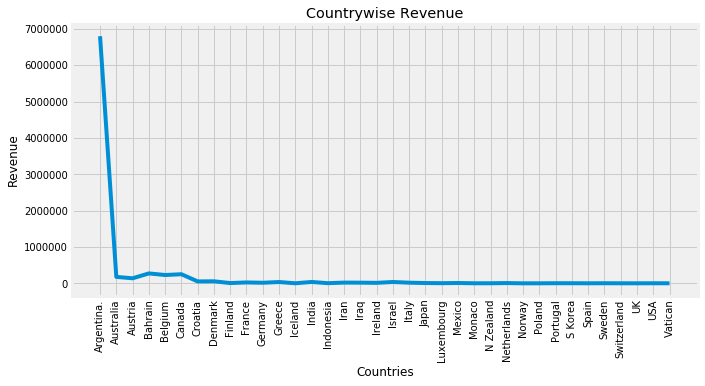

In [28]:
plotMyLineGraph(countryRevenueMap.index,countryRevenueMap.Revenue,"Countrywise Revenue","Countries","Revenue")

Since Revenue for Argentina is so high, not able to make out any other reading from above graph. 

## Revenue for Argentina looks like an outlier

Since Revenue for Argentina is so high when ploted with Revenue for other Contries, not able to read the Graph. Just for visualisation purpose creating new dataset by omitting, possible Outlier with respect to Revenue feature.

Though Revenue of Argentina is outlier, we can not ommit it while studying data with respect to Country. We can study Argentina and other Contries separately. 

In [29]:
countryRevenueMap.describe()

,Revenue
count,3.600000e+01
mean,2.291066e+05
std,1.128099e+06
min,1.459200e+02
25%,2.019138e+03
50%,8.669935e+03
75%,3.680509e+04
max,6.795530e+06


In [30]:
countryRevenueMapWithoutOutlier = removeOutlier(countryRevenueMap, "Revenue")

Revenue  low :  -50159.791250000024  high :  88984.01875000003 



In [31]:
print("Original Shape : ",countryRevenueMap.shape)
print("New Shape : ",countryRevenueMapWithoutOutlier.shape)

Original Shape :  (36, 1)
New Shape :  (30, 1)


In [32]:
countryRevenueMapWithoutOutlier.describe()

,Revenue
count,30.000000
mean,12863.270333
std,15780.017568
min,145.920000
25%,1736.605000
50%,5529.915000
75%,17863.360000
max,55436.900000


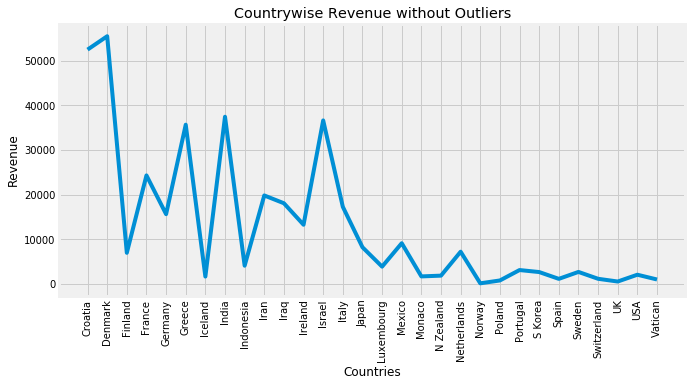

In [33]:
plotMyLineGraph(countryRevenueMapWithoutOutlier.index,countryRevenueMapWithoutOutlier.Revenue,"Countrywise Revenue without Outliers","Countries","Revenue")

Now we can clearly see wave of Graph, which is just a small hump in above graph

## Revenue Growth Rate YEAR-MONTH wise 

In [34]:
processedDataFrame.columns

Index(['InvoiceNo', 'ItemCode', 'item_Desc', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'CustomerName', 'Country', 'year', 'month',
       'day', 'YearMonth', 'Revenue'],
      dtype='object')

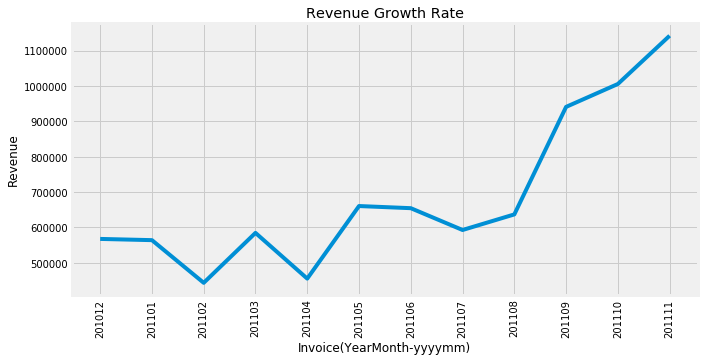

In [35]:
invoiceRevenueList = processedDataFrame[['YearMonth', 'Revenue']]
invoiceRevenueMap = invoiceRevenueList.groupby(by=["YearMonth"]).sum()
plotMyLineGraph(invoiceRevenueMap.index.astype(str),invoiceRevenueMap.Revenue,"Revenue Growth Rate","Invoice(YearMonth-yyyymm)","Revenue")

In above Graph we see downward behaviour in Revenue for month of Feb, April and July. Otherwise Revenue is either steady or Increasing. We also Notice for Jan, Jun, August and October Revenue Increase rate either near to zero or very minimal compare to other Months.  

## Result on a Chloropleth Map

In [36]:
countriwise_describe = processedDataFrame['Country'].describe()
countriwise_describe

count         379095
unique            36
top       Argentina.
freq          338194
Name: Country, dtype: object

We See in dataset we have total 379095 Transactions, Which was generated through 
36 contries. Argentina has Heighest number
of Transactions recorded. Number of Transactions done in Argentina are 338194.  
      

In [37]:
# No of countries from which orders are made 
countryCustomerInvoiceCount = processedDataFrame[['CustomerID', 'InvoiceNo', 'Country']].groupby(['CustomerID', 'InvoiceNo', 'Country']).count()
countryCustomerInvoiceMap = countryCustomerInvoiceCount.reset_index(drop = False)
countries = countryCustomerInvoiceMap['Country'].value_counts()
print(f'Numbers of countries order made: {len(countries)}')

Numbers of countries order made: 36


In [38]:
init_notebook_mode(connected=True)

data = dict(type='choropleth',
locations = countries.index,
locationmode = 'country names', z = countries,
text = countries.index, colorbar = {'title':'Order Count'},
colorscale=[[0, 'rgb(224,255,255)'],
            [0.01, 'rgb(166,206,227)'], [0.02, 'rgb(31,120,180)'],
            [0.03, 'rgb(178,223,138)'], [0.05, 'rgb(51,160,44)'],
            [0.10, 'rgb(251,154,153)'], [0.20, 'rgb(255,255,0)'],
            [1, 'rgb(227,26,28)']],    
reversescale = False)

layout = dict(title='Orders Country-wise', width=900, height=900, 
geo = dict(showframe = True, projection={'type':'mercator'}))

choromap = go.Figure(data = [data], layout = layout)
iplot(choromap, validate=False)

Graph above is self explainatry and interactive. Hover over a Country to see number of transaction made in that country

## Monthly Revenue Growth Rate

In [39]:
#using pct_change() function to see monthly percentage change
invoiceRevenueMap['MonthlyGrowth'] = invoiceRevenueMap['Revenue'].pct_change()
invoiceRevenueMap=invoiceRevenueMap.fillna(0)
#showing first 5 rows
invoiceRevenueMap.head()

,Revenue,MonthlyGrowth
YearMonth,,
201012,567490.72,0.000000
201101,564026.64,-0.006104
201102,443346.02,-0.213963
201103,584562.85,0.318525
201104,455266.91,-0.221184


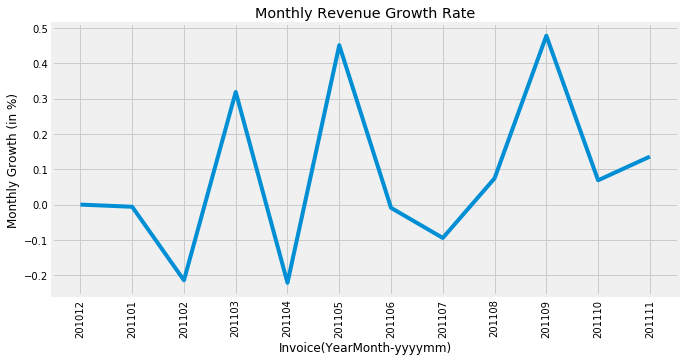

In [40]:
plotMyLineGraph(invoiceRevenueMap.index.astype(str),invoiceRevenueMap.MonthlyGrowth,"Monthly Revenue Growth Rate","Invoice(YearMonth-yyyymm)","Monthly Growth (in %)")

Above Graph shows, Percentage change in Revenue Growth, Month wise. e.g. we see Rate by which Revenue changes from August to September is positive (going upwards), compare to Rate by which Revenue change from September to October (going downwards). This Implies that, if you Compare previous Graph "Revenue Growth Rate", Even though Revenue Increase from August to September and keep increasing from September to October, but Rate By which it increases between September October is lesser (hence moving downward) than Rate by which Revenue increased from August to September.  

## Distribution of total spend per customer

In [41]:
# Sum Revenue group by 'CustomerID', 'InvoiceNo'
groupedByCustomer1 = processedDataFrame.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['Revenue'].sum()
basketPrice = groupedByCustomer1.rename(columns = {'Revenue':'Basket Price'})

# convert data to int64
processedDataFrame['InvoiceDate_int'] = processedDataFrame['InvoiceDate'].astype('int64')

groupedByCustomer2 = processedDataFrame.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate_int'].mean()
processedDataFrame.drop('InvoiceDate_int', axis = 1, inplace = True)
basketPrice.loc[:, 'InvoiceDate'] = pd.to_datetime(groupedByCustomer2['InvoiceDate_int'])

# selection Basket Price > 0
basketPrice = basketPrice[basketPrice['Basket Price'] > 0]
basketPrice.sort_values('CustomerID')[:6]

,CustomerID,InvoiceNo,Basket Price,InvoiceDate
0,12346.0,541431,77183.60,2011-01-18 10:01:00.000000000
1,12347.0,537626,711.79,2010-12-07 14:57:00.000001024
2,12347.0,542237,475.39,2011-01-26 14:29:59.999999744
3,12347.0,549222,636.25,2011-04-07 10:42:59.999999232
4,12347.0,556201,382.52,2011-06-09 13:01:00.000000256
5,12347.0,562032,584.91,2011-08-02 08:48:00.000000000


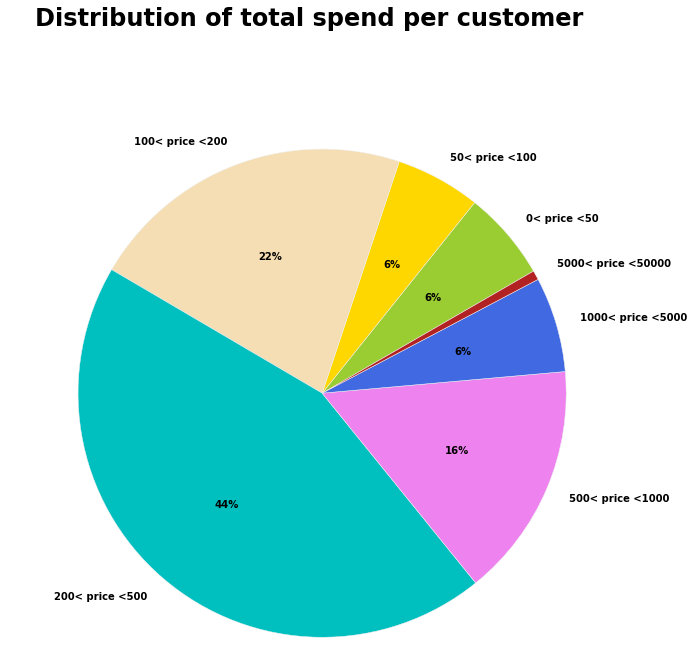

In [42]:
# Purchase count
# price_range = [0, 50, 100, 200, 500, 1000, 5000, basket_price['TotalValue'].max().round(0)]
priceRange = [0, 50, 100, 200, 500, 1000, 5000, 50000]
priceCount = []
for i, price in enumerate(priceRange):
    if i == 0: continue
    val = basketPrice[(basketPrice['Basket Price'] < price) &
                       (basketPrice['Basket Price'] > priceRange[i-1])]['Basket Price'].count()
    priceCount.append(val)

# Representation of the number of purchases / amount      
plt.rc('font', weight='bold')

f, ax = plt.subplots(figsize=(10, 10))
colors = ['yellowgreen', 'gold', 'wheat', 'c', 'violet', 'royalblue','firebrick']
labels = [ f'{priceRange[i-1]}< price <{s}' for i,s in enumerate(priceRange) if i != 0]
sizes  = priceCount
explode = [0.0 if sizes[i] < 100 else 0.0 for i in range(len(sizes))]
ax.pie(sizes, explode = explode, labels=labels, colors = colors,
       autopct = lambda x:'{:1.0f}%'.format(x) if x > 1 else '',
       shadow = False, startangle=30)
ax.axis('equal')
f.text(0.5, 1.01, "Distribution of total spend per customer", ha='center', fontsize = 24);

## Monthly Active Customers 
### To see the details Monthly Active Customers, we can get the monthly active customers by counting unique CustomerIDs

In [43]:
#creating monthly active customers dataframe by counting unique Customer IDs
activeTnxMonthly = processedDataFrame.groupby('YearMonth')['CustomerID'].nunique().reset_index()

#print the dataframe
activeTnxMonthly

,YearMonth,CustomerID
0,201012,884
1,201101,739
2,201102,757
3,201103,973
4,201104,853
5,201105,1054
6,201106,990
7,201107,946
8,201108,933
9,201109,1259


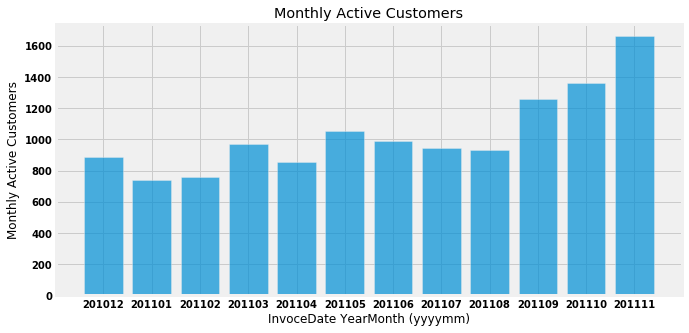

In [44]:
plotMyBarGraph(activeTnxMonthly.YearMonth, activeTnxMonthly.CustomerID, 'Monthly Active Customers', 'InvoceDate YearMonth (yyyymm)', 'Monthly Active Customers')

Above Graph Shows number of Customers active pe month. We observe November is month with highest number of customers active, engaged with Shop. We also Observe Active Customer count keep incresing since September till November, this could be due Christmus season in December. Also Most Active Customers increased in March, May, September and November,whereas sudden decrease seen in Jan and April. 

## Trend for number of orders per Month 

In [45]:
#create a new dataframe for no. of order by using quantity field
saleTnxMonthly = processedDataFrame.groupby('YearMonth')['Quantity'].sum().reset_index()

#print the dataframe
saleTnxMonthly

,YearMonth,Quantity
0,201012,311840
1,201101,348803
2,201102,265380
3,201103,348164
4,201104,291972
5,201105,373325
6,201106,363410
7,201107,369113
8,201108,397847
9,201109,544070


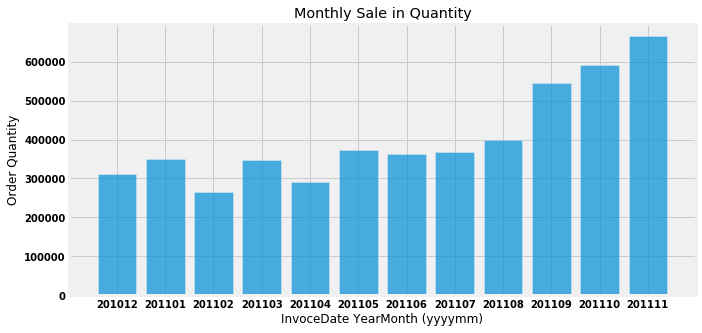

In [46]:
plotMyBarGraph(saleTnxMonthly.YearMonth, saleTnxMonthly.Quantity, 'Monthly Sale in Quantity', 'InvoceDate YearMonth (yyyymm)', 'Order Quantity')

We observe Almost similar trand in Monthly Orders graph, as Monthly Active Customers

## Average Revenue per Order 

In [47]:
# create a new dataframe for average revenue by taking the mean of it
monthlyOrderAvg = processedDataFrame.groupby('YearMonth')['Revenue'].mean().reset_index()

#print the dataframe
monthlyOrderAvg

,YearMonth,Revenue
0,201012,21.779656
1,201101,26.684328
2,201102,22.333687
3,201103,21.606463
4,201104,20.185639
5,201105,23.415532
6,201106,24.167531
7,201107,22.183910
8,201108,23.673132
9,201109,23.599810


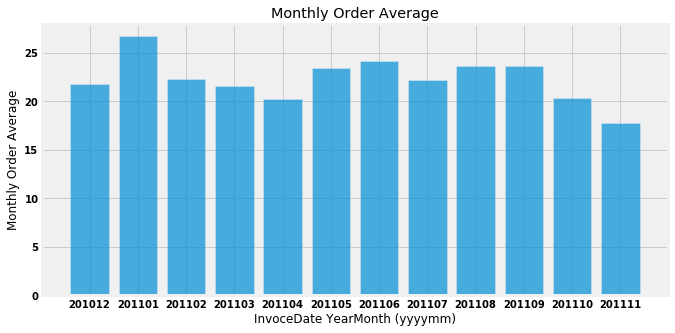

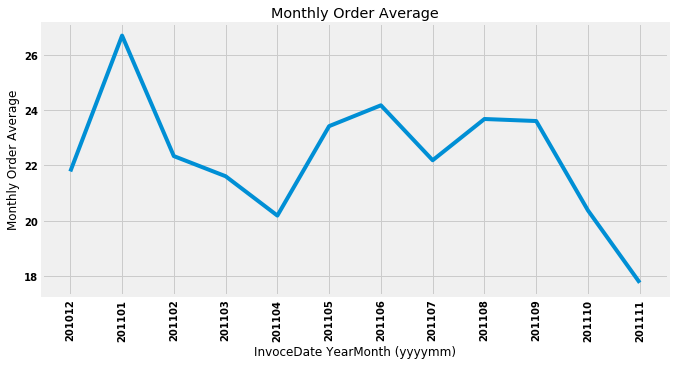

In [48]:
plotMyBarGraph(monthlyOrderAvg.YearMonth, monthlyOrderAvg.Revenue, 'Monthly Order Average', 'InvoceDate YearMonth (yyyymm)', 'Monthly Order Average')
plotMyLineGraph(monthlyOrderAvg.YearMonth.astype(str), monthlyOrderAvg.Revenue, 'Monthly Order Average', 'InvoceDate YearMonth (yyyymm)', 'Monthly Order Average')

Compare to "'Monthly Active Customers" graph, despite of increase in Active Customers and sell Qantity in March, May, Septemeber and November we see drop in Mothly Average Revenue in March and November, this implies though Cutomer Count and sold Qantity in creased in  these two months, Customers mostly prefer Low Unit Price products compare to May and September.

## New Customer Ratio - New & Existing Customer
### New customer is whoever did his/her first purchase in the time window we defined.

For a Start we consider time Window as entire Date Range available.

In [49]:
#create a dataframe contaning CustomerID and first purchase date
minPurchase = processedDataFrame.groupby('CustomerID').InvoiceDate.min().reset_index()
minPurchase.columns = ['CustomerID','MinPurchaseDate']
minPurchase['MinPurchaseYearMonth'] = minPurchase['MinPurchaseDate'].map(lambda date: 100*date.year + date.month)

#merge first purchase date column to our main dataframe (tx_uk)
processedDataFrame = pd.merge(processedDataFrame, minPurchase, on='CustomerID')

processedDataFrame.head()

,InvoiceNo,ItemCode,item_Desc,Quantity,InvoiceDate,UnitPrice,CustomerID,CustomerName,Country,year,month,day,YearMonth,Revenue,MinPurchaseDate,MinPurchaseYearMonth
0,536365,10742201412,Microclimate Headband-Black/Black,6,2010-12-01 08:26:00,2.55,17850.0,Matthew-Clark,Argentina.,2010,12,1,201012,15.30,2010-12-01 08:26:00,201012
1,536365,10742201610,Microclimate Headband-Blazing Orange/Charcoal,6,2010-12-01 08:26:00,3.39,17850.0,Matthew-Clark,Argentina.,2010,12,1,201012,20.34,2010-12-01 08:26:00,201012
2,536365,10742201719,Microclimate Headband-Coral Rose/Charcoal,8,2010-12-01 08:26:00,2.75,17850.0,Matthew-Clark,Argentina.,2010,12,1,201012,22.00,2010-12-01 08:26:00,201012
3,536365,10742201818,SF-2 LS-Small,6,2010-12-01 08:26:00,3.39,17850.0,Matthew-Clark,Argentina.,2010,12,1,201012,20.34,2010-12-01 08:26:00,201012
4,536365,10742202211,SF-2 LS-Medium,6,2010-12-01 08:26:00,3.39,17850.0,Matthew-Clark,Argentina.,2010,12,1,201012,20.34,2010-12-01 08:26:00,201012


In [50]:
#create a column called User Type and assign Existing 
#if User's First Purchase Year Month before the selected Invoice Year Month
processedDataFrame['UserType'] = 'New'
processedDataFrame.loc[processedDataFrame['YearMonth']>processedDataFrame['MinPurchaseYearMonth'],'UserType'] = 'Existing'

processedDataFrame.UserType.value_counts()

Existing    261749
New         117346
Name: UserType, dtype: int64

In [51]:
#calculate the Revenue per month for each user type
userBasedRevenue = processedDataFrame.groupby(['YearMonth','UserType'])['Revenue'].sum().reset_index()

#filtering the dates and plot the result
userBasedRevenue = userBasedRevenue.query("YearMonth != 201012 and YearMonth != 201112")

plot_data = [
    go.Scatter(
        x=userBasedRevenue.query("UserType == 'Existing'")['YearMonth'],
        y=userBasedRevenue.query("UserType == 'Existing'")['Revenue'],
        name = 'Existing'
    ),
    go.Scatter(
        x=userBasedRevenue.query("UserType == 'New'")['YearMonth'],
        y=userBasedRevenue.query("UserType == 'New'")['Revenue'],
        name = 'New'
    )
]

plot_layout = go.Layout(
        xaxis={"type": "category"},
        title='New vs Existing'
    )

fig = go.Figure(data=plot_data, layout=plot_layout)
iplot(fig)

Above Graph shows Revenue generated by Existing Customers vs. Revenue Generated by New Customers per month.This graph implies that Shop is performing very good in Retaining Existing Customers, Shop Policies are successful in converting New Customers to Loyal Customers, satisfying their need thus increasing Revenue generated by Existing Customers. On Other hand it looks like Shop is not able to acquire New Customers each month. In fact Revenue generated by New customers is decresing over the time. This implies Shop successfully able to convince Customers to return to Shop for more purchase but failing to acquire new Customer base in market. This implies Shop need to employ inovative ideas to lure New Customers while keeping Existing Customer base.

In [52]:
#Find New Customer Count per month
new_customers = processedDataFrame[processedDataFrame.UserType == 'New'].groupby('YearMonth')['CustomerID'].nunique().reset_index()

#print the dataframe
new_customers

,YearMonth,CustomerID
0,201012,884
1,201101,416
2,201102,380
3,201103,452
4,201104,300
5,201105,284
6,201106,242
7,201107,187
8,201108,169
9,201109,299


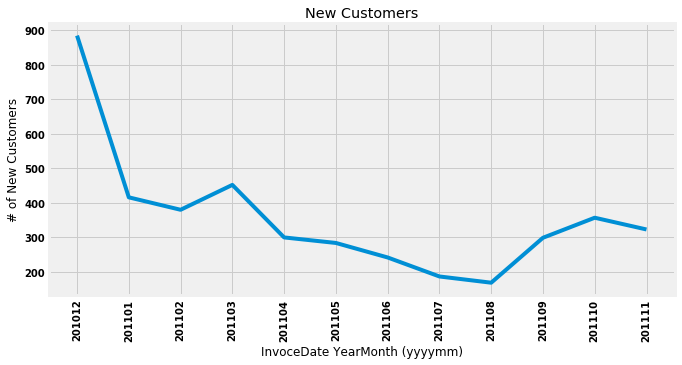

In [53]:
plotMyLineGraph(new_customers.YearMonth.astype(str), new_customers.CustomerID, 'New Customers', 'InvoceDate YearMonth (yyyymm)', '# of New Customers')

Dec 2010 had Highest number of new Customer registered but that is bacuse data limitation and way we find New Customers. 
Second Heightest New Customers registered was in March 2011, Since then New Customer count is decreasing.
August, 2011 had least new Customers registered, which then inclined till October 2011, but inline to above graph, Overall capability of Shop to acquire New Customers is decresing considerably.

In [54]:
#using pct_change() function to see monthly percentage change
new_customers['MonthlyGrowth'] = new_customers['CustomerID'].pct_change()
new_customers=new_customers.fillna(0)

new_customers

,YearMonth,CustomerID,MonthlyGrowth
0,201012,884,0.000000
1,201101,416,-0.529412
2,201102,380,-0.086538
3,201103,452,0.189474
4,201104,300,-0.336283
5,201105,284,-0.053333
6,201106,242,-0.147887
7,201107,187,-0.227273
8,201108,169,-0.096257
9,201109,299,0.769231


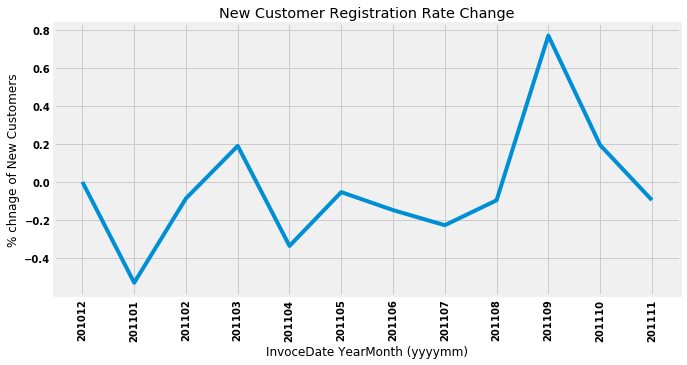

In [55]:
plotMyLineGraph(new_customers.YearMonth.astype(str), new_customers.MonthlyGrowth, 'New Customer Registration Rate Change', 'InvoceDate YearMonth (yyyymm)', '% chnage of New Customers')

Though Highest Customers added in March 2011, Rate of adding New Customers was high in Sep 2011, If we could identify
resons of why less Customers were added in earlier months and could eliminate those reasons
Cusatomer base would have increased considerably in Sep 2011

In [56]:
#Find New Customer Count per month
existing_customers = processedDataFrame[processedDataFrame.UserType == 'Existing'].groupby('YearMonth')['CustomerID'].nunique().reset_index()

#print the dataframe
existing_customers

,YearMonth,CustomerID
0,201101,323
1,201102,377
2,201103,521
3,201104,553
4,201105,770
5,201106,748
6,201107,759
7,201108,764
8,201109,960
9,201110,1004


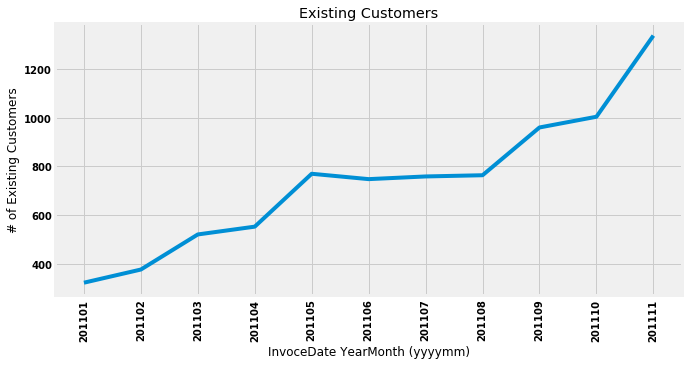

In [57]:
plotMyLineGraph(existing_customers.YearMonth.astype(str), existing_customers.CustomerID, 'Existing Customers', 'InvoceDate YearMonth (yyyymm)', '# of Existing Customers')

Steady increase in above graph shows Shop is fulfilling Customers need. 

In [58]:
#using pct_change() function to see monthly percentage change
existing_customers['MonthlyGrowth'] = existing_customers['CustomerID'].pct_change()
existing_customers=existing_customers.fillna(0)

existing_customers

,YearMonth,CustomerID,MonthlyGrowth
0,201101,323,0.000000
1,201102,377,0.167183
2,201103,521,0.381963
3,201104,553,0.061420
4,201105,770,0.392405
5,201106,748,-0.028571
6,201107,759,0.014706
7,201108,764,0.006588
8,201109,960,0.256545
9,201110,1004,0.045833


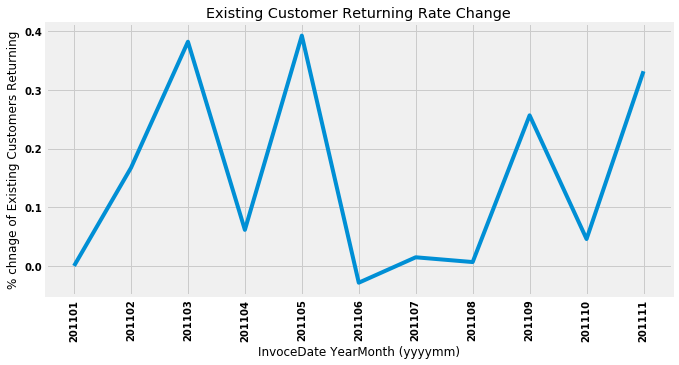

In [59]:
plotMyLineGraph(existing_customers.YearMonth.astype(str), existing_customers.MonthlyGrowth, 'Existing Customer Returning Rate Change', 'InvoceDate YearMonth (yyyymm)', '% chnage of Existing Customers Returning')

In March and May of 2011 maximum Customers retunred to Shop to shop again. If we could find out what items
Cutomers purchased which is common, that would be USP of Shop.

## Monthly Revenue based on New & Existing Customers

In [60]:
#calculate the Revenue per month for each user type
tx_user_type_revenue = processedDataFrame.groupby(['YearMonth','UserType'])['Revenue'].sum().reset_index()
print(tx_user_type_revenue.shape)
#filtering the dates and plot the result
tx_user_type_revenue = tx_user_type_revenue.query("YearMonth != 201012 and YearMonth != 201112")
print(tx_user_type_revenue.shape)
tx_user_type_revenue.head(6)

(23, 3)
(22, 3)


,YearMonth,UserType,Revenue
1,201101,Existing,274152.84
2,201101,New,289873.80
3,201102,Existing,285654.49
4,201102,New,157691.53
5,201103,Existing,387345.73
6,201103,New,197217.12


In [61]:
#create a dataframe that shows new user ratio - we also need to drop NA values (first month new user ratio is 0)
tx_user_ratio = processedDataFrame.query("UserType == 'New'").groupby(['YearMonth'])['CustomerID'].nunique()/processedDataFrame.query("UserType == 'Existing'").groupby(['YearMonth'])['CustomerID'].nunique() 
tx_user_ratio = tx_user_ratio.reset_index()
tx_user_ratio = tx_user_ratio.dropna()
# New Customers
print("Graph already drawn above")
processedDataFrame.query("UserType == 'New'").groupby(['YearMonth'])['CustomerID'].nunique()

Graph already drawn above


YearMonth
201012    884
201101    416
201102    380
201103    452
201104    300
201105    284
201106    242
201107    187
201108    169
201109    299
201110    357
201111    323
Name: CustomerID, dtype: int64

In [62]:
# Existing Customer
print("Graph already drawn above")
processedDataFrame.query("UserType == 'Existing'").groupby(['YearMonth'])['CustomerID'].nunique()

Graph already drawn above


YearMonth
201101     323
201102     377
201103     521
201104     553
201105     770
201106     748
201107     759
201108     764
201109     960
201110    1004
201111    1337
Name: CustomerID, dtype: int64

# Monthly Retention Rate

Retention rate should be monitored very closely because it indicates how sticky is your service and how well your product fits the market. For making Monthly Retention Rate visualized, we need to calculate how many customers retained from previous month.
Monthly Retention Rate = Retained Customers From Prev. Month/Active Customers Total

In [63]:
activeTnxMonthly

,YearMonth,CustomerID
0,201012,884
1,201101,739
2,201102,757
3,201103,973
4,201104,853
5,201105,1054
6,201106,990
7,201107,946
8,201108,933
9,201109,1259


In [64]:
tx_user_purchase = processedDataFrame.groupby(['CustomerID','YearMonth'])['Revenue'].sum().astype(int).reset_index()
tx_user_purchase

,CustomerID,YearMonth,Revenue
0,12346.0,201101,77183
1,12347.0,201012,711
2,12347.0,201101,475
3,12347.0,201104,636
4,12347.0,201106,382
...,...,...,...
12404,18283.0,201109,130
12405,18283.0,201110,114
12406,18283.0,201111,651
12407,18287.0,201105,765


In [65]:
# useing cross Tab
tx_retention = pd.crosstab(tx_user_purchase['CustomerID'], tx_user_purchase['YearMonth']).reset_index()
tx_retention.head()

YearMonth,CustomerID,201012,201101,201102,201103,201104,201105,201106,201107,201108,201109,201110,201111
0,12346.0,0,1,0,0,0,0,0,0,0,0,0,0
1,12347.0,1,1,0,0,1,0,1,0,1,0,1,0
2,12348.0,1,1,0,0,1,0,0,0,0,1,0,0
3,12349.0,0,0,0,0,0,0,0,0,0,0,0,1
4,12350.0,0,0,1,0,0,0,0,0,0,0,0,0


In [66]:
tx_retention.columns

Index(['CustomerID',       201012,       201101,       201102,       201103,
             201104,       201105,       201106,       201107,       201108,
             201109,       201110,       201111],
      dtype='object', name='YearMonth')

In [67]:
months = tx_retention.columns[1:]
months

Index([201012, 201101, 201102, 201103, 201104, 201105, 201106, 201107, 201108,
       201109, 201110, 201111],
      dtype='object', name='YearMonth')

In [68]:
retention_array = []
for i in range(len(months)-1):
    retention_data = {}
    selected_month = months[i+1]
    prev_month = months[i]
    retention_data['YearMonth'] = int(selected_month)
    retention_data['TotalUserCount'] = tx_retention[selected_month].sum()
    retention_data['RetainedUserCount'] = tx_retention[(tx_retention[selected_month]>0) & (tx_retention[prev_month]>0)][selected_month].sum()
    retention_array.append(retention_data)

In [69]:
tx_retention = pd.DataFrame(retention_array)
tx_retention['RetentionRate'] = tx_retention['RetainedUserCount']/tx_retention['TotalUserCount']
tx_retention

,YearMonth,TotalUserCount,RetainedUserCount,RetentionRate
0,201101,739,323,0.437077
1,201102,757,260,0.343461
2,201103,973,290,0.298047
3,201104,853,301,0.352872
4,201105,1054,366,0.347249
5,201106,990,410,0.414141
6,201107,946,365,0.385835
7,201108,933,386,0.413719
8,201109,1259,423,0.335981
9,201110,1361,487,0.357825


# Churn Rate 

In [70]:
tx_retention['ChurnRate'] =  1- tx_retention['RetentionRate']
tx_retention

,YearMonth,TotalUserCount,RetainedUserCount,RetentionRate,ChurnRate
0,201101,739,323,0.437077,0.562923
1,201102,757,260,0.343461,0.656539
2,201103,973,290,0.298047,0.701953
3,201104,853,301,0.352872,0.647128
4,201105,1054,366,0.347249,0.652751
5,201106,990,410,0.414141,0.585859
6,201107,946,365,0.385835,0.614165
7,201108,933,386,0.413719,0.586281
8,201109,1259,423,0.335981,0.664019
9,201110,1361,487,0.357825,0.642175


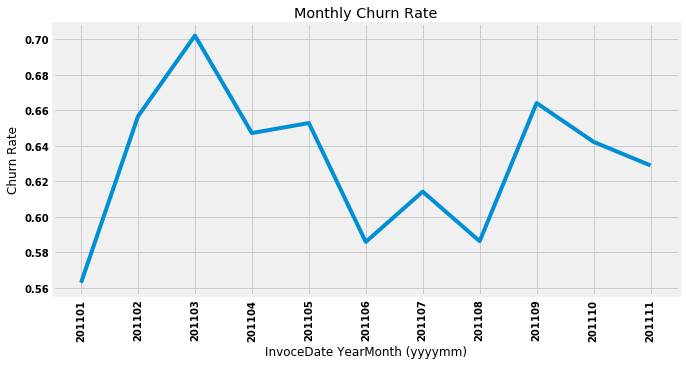

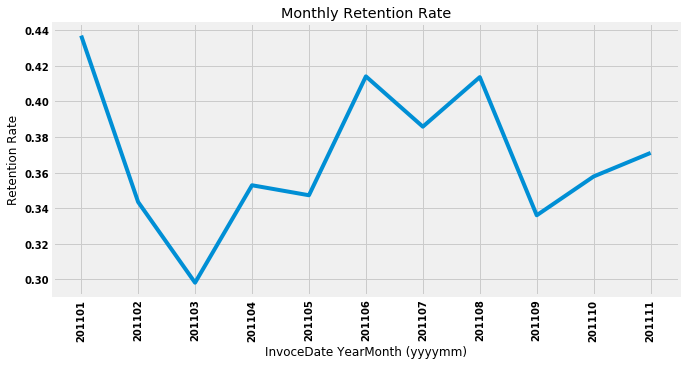

In [71]:
plotMyLineGraph(tx_retention.YearMonth.astype(str), tx_retention.ChurnRate, 'Monthly Churn Rate', 'InvoceDate YearMonth (yyyymm)', 'Churn Rate')
plotMyLineGraph(tx_retention.YearMonth.astype(str), tx_retention.RetentionRate, 'Monthly Retention Rate', 'InvoceDate YearMonth (yyyymm)', 'Retention Rate')

# Top 25 Most Revenue generating Items 

In [72]:
processedDataFrame.head(5)

,InvoiceNo,ItemCode,item_Desc,Quantity,InvoiceDate,UnitPrice,CustomerID,CustomerName,Country,year,month,day,YearMonth,Revenue,MinPurchaseDate,MinPurchaseYearMonth,UserType
0,536365,10742201412,Microclimate Headband-Black/Black,6,2010-12-01 08:26:00,2.55,17850.0,Matthew-Clark,Argentina.,2010,12,1,201012,15.30,2010-12-01 08:26:00,201012,New
1,536365,10742201610,Microclimate Headband-Blazing Orange/Charcoal,6,2010-12-01 08:26:00,3.39,17850.0,Matthew-Clark,Argentina.,2010,12,1,201012,20.34,2010-12-01 08:26:00,201012,New
2,536365,10742201719,Microclimate Headband-Coral Rose/Charcoal,8,2010-12-01 08:26:00,2.75,17850.0,Matthew-Clark,Argentina.,2010,12,1,201012,22.00,2010-12-01 08:26:00,201012,New
3,536365,10742201818,SF-2 LS-Small,6,2010-12-01 08:26:00,3.39,17850.0,Matthew-Clark,Argentina.,2010,12,1,201012,20.34,2010-12-01 08:26:00,201012,New
4,536365,10742202211,SF-2 LS-Medium,6,2010-12-01 08:26:00,3.39,17850.0,Matthew-Clark,Argentina.,2010,12,1,201012,20.34,2010-12-01 08:26:00,201012,New


In [73]:
most_revenue_items = processedDataFrame.query("Revenue > 100").groupby(['ItemCode','item_Desc'])['Revenue'].sum().reset_index().sort_values(by=['Revenue'], ascending=False).reset_index(drop=True)

most_revenue_itemCode = most_revenue_items['ItemCode'][0]
most_revenue_item_Desc = most_revenue_items['item_Desc'][0]

print(f'Most Revenue Generated by Item : \"{most_revenue_item_Desc}\", Item Code : {most_revenue_itemCode}')

most_revenue_items = most_revenue_items[:25]
most_revenue_items.head(5)



Most Revenue Generated by Item : "Boy's Hotwalk-Black/Yellow/Blue", Item Code : 20449773


,ItemCode,item_Desc,Revenue
0,20449773,Boy's Hotwalk-Black/Yellow/Blue,97757.25
1,4715600000000,2002 Innershorts-Small,77942.96
2,20123932,E-Cage 6.0 MTB-Anodized Black,54607.54
3,10742201412,Microclimate Headband-Black/Black,48022.49
4,20181703,Crossroads Tire (26-inch)-,41698.50


D:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning:

Glyph 31 missing from current font.

D:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning:

Glyph 31 missing from current font.



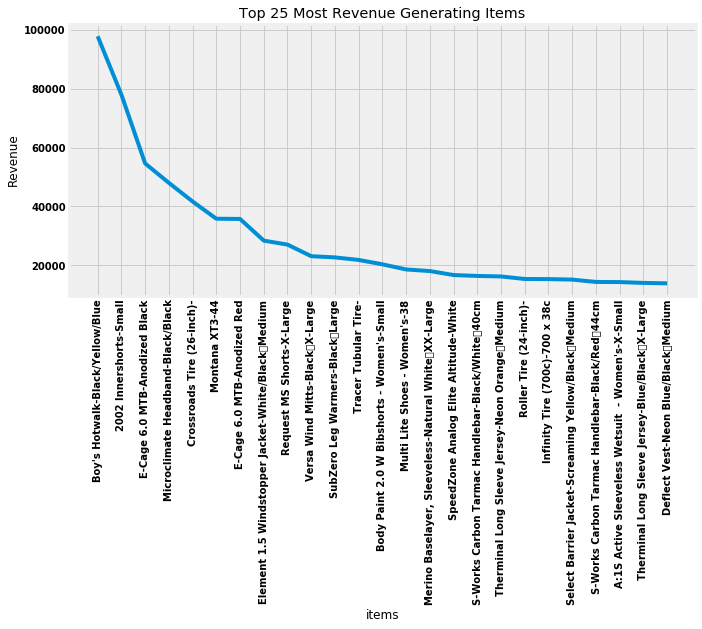

In [74]:
plotMyLineGraph(most_revenue_items.item_Desc, most_revenue_items.Revenue, 'Top 25 Most Revenue Generating Items', 'items', 'Revenue')

# Most Revenue generating Item Purchase pattern. 

In [75]:
most_revenue_item_purchase = processedDataFrame.query("ItemCode == 20449773").groupby(['YearMonth'])['ItemCode'].count().reset_index()

most_revenue_item_purchase

,YearMonth,ItemCode
0,201012,140
1,201101,109
2,201102,111
3,201103,168
4,201104,157
5,201105,171
6,201106,117
7,201107,121
8,201108,121
9,201109,135


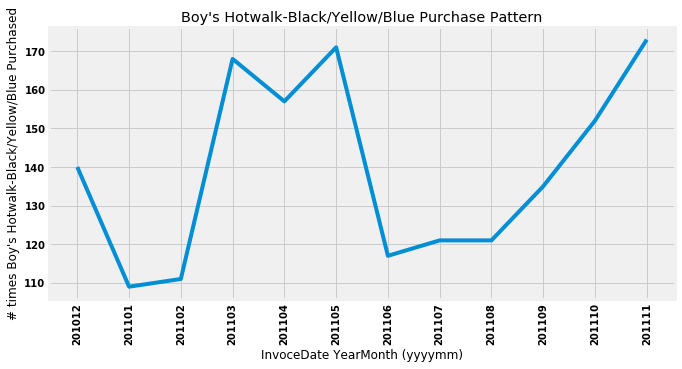

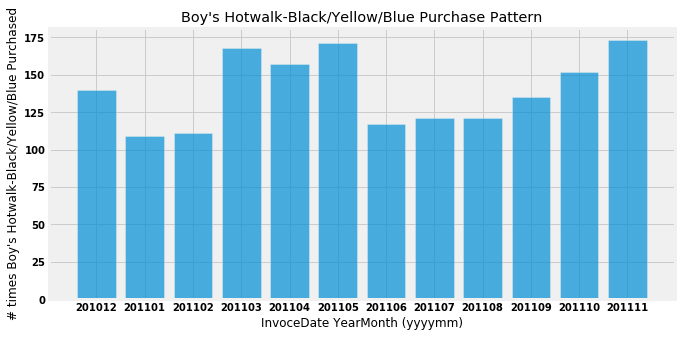

In [76]:
plotMyLineGraph(most_revenue_item_purchase.YearMonth.astype(str), most_revenue_item_purchase.ItemCode, most_revenue_item_Desc +' Purchase Pattern', 'InvoceDate YearMonth (yyyymm)', '# times '+most_revenue_item_Desc+' Purchased')
plotMyBarGraph(most_revenue_item_purchase.YearMonth.astype(str), most_revenue_item_purchase.ItemCode, most_revenue_item_Desc +' Purchase Pattern', 'InvoceDate YearMonth (yyyymm)', '# times '+most_revenue_item_Desc+' Purchased')


Seems there is high demand for "Boy's Hotwalk-Black/Yellow/Blue" on March, April, May October and November, 
we can accordingly do the Inventory planning.
We Can do similar exercise on remaining Top 10 items for better Inventory Planning.
Also we can do same exercise for Bottom 10 Items to understand how to improve sell. 

In [77]:
most_revenue_item_purchase['MonthlyGrowth'] = most_revenue_item_purchase['ItemCode'].pct_change()
most_revenue_item_purchase=most_revenue_item_purchase.fillna(0)
most_revenue_item_purchase

,YearMonth,ItemCode,MonthlyGrowth
0,201012,140,0.000000
1,201101,109,-0.221429
2,201102,111,0.018349
3,201103,168,0.513514
4,201104,157,-0.065476
5,201105,171,0.089172
6,201106,117,-0.315789
7,201107,121,0.034188
8,201108,121,0.000000
9,201109,135,0.115702


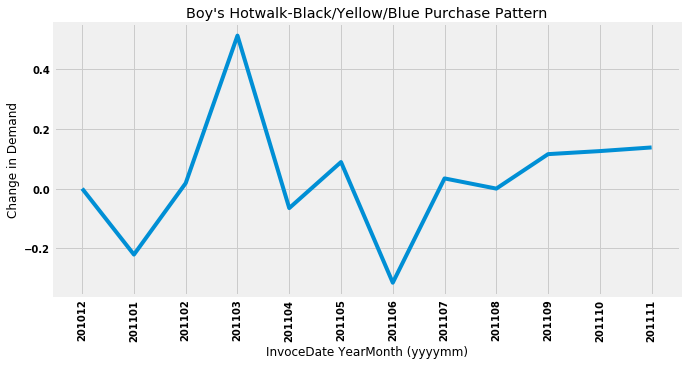

In [78]:
plotMyLineGraph(most_revenue_item_purchase.YearMonth.astype(str), most_revenue_item_purchase.MonthlyGrowth, most_revenue_item_Desc +' Purchase Pattern', 'InvoceDate YearMonth (yyyymm)', 'Change in Demand')

We see Sudden raise in March and sudden Drop in Demand in June

# Top 25 Most Purchased Items 

In [79]:
most_purchased_item = processedDataFrame.groupby(['ItemCode', 'item_Desc'])['CustomerID'].count().reset_index()

most_purchased_item = most_purchased_item.rename(columns = {'CustomerID': 'ItemCount'}, inplace = False)
most_purchased_item = most_purchased_item.sort_values(by=['ItemCount'], ascending=False).reset_index(drop=True)

most_purchased_itemCode = most_purchased_item['ItemCode'][0]
most_purchased_item_Desc = most_purchased_item['item_Desc'][0]

print(f'Most Purchased Item : \"{most_purchased_item_Desc}\", Item Code : {most_purchased_itemCode}')

most_purchased_item = most_purchased_item[:25]
most_purchased_item.head(5)

Most Purchased Item : "Microclimate Headband-Black/Black", Item Code : 10742201412


,ItemCode,item_Desc,ItemCount
0,10742201412,Microclimate Headband-Black/Black,1976
1,20449773,Boy's Hotwalk-Black/Yellow/Blue,1675
2,20123932,E-Cage 6.0 MTB-Anodized Black,1576
3,20561451,Montana XT3-44,1378
4,11113470321,Tracer Tubular Tire-,1366


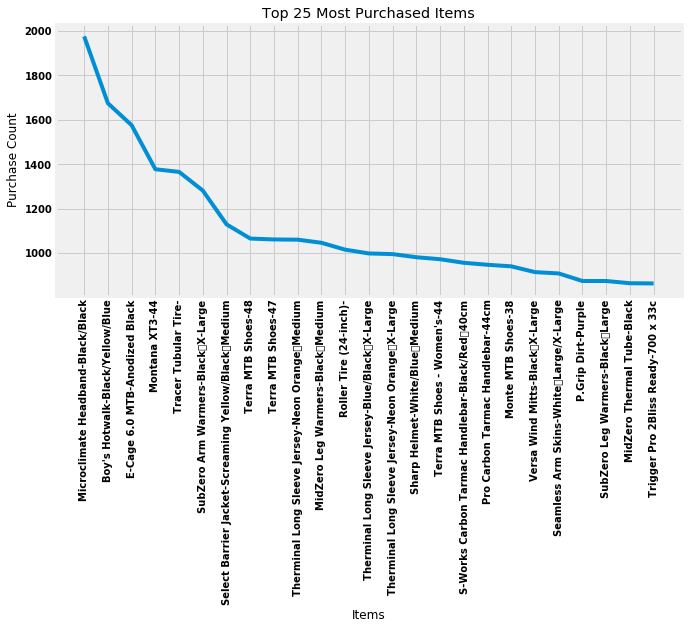

In [80]:
plotMyLineGraph(most_purchased_item.item_Desc, most_purchased_item.ItemCount, 'Top 25 Most Purchased Items', 'Items', 'Purchase Count')

# Most Purchased Item Purchase pattern. 

In [81]:
most_purchase_item_patern = processedDataFrame.query("ItemCode == 10742201412").groupby(['YearMonth'])['ItemCode'].count().reset_index()

most_purchase_item_patern

,YearMonth,ItemCode
0,201012,207
1,201101,160
2,201102,127
3,201103,171
4,201104,158
5,201105,199
6,201106,128
7,201107,147
8,201108,133
9,201109,158


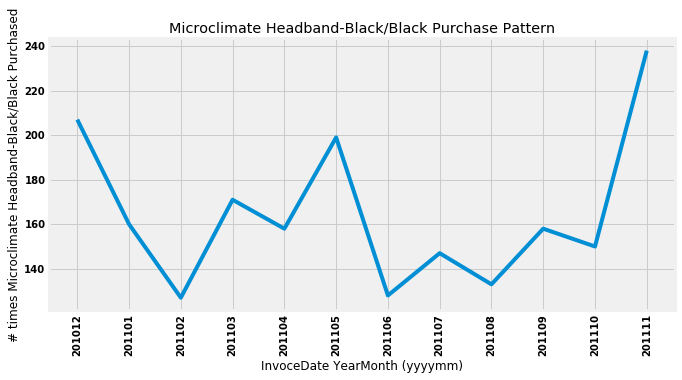

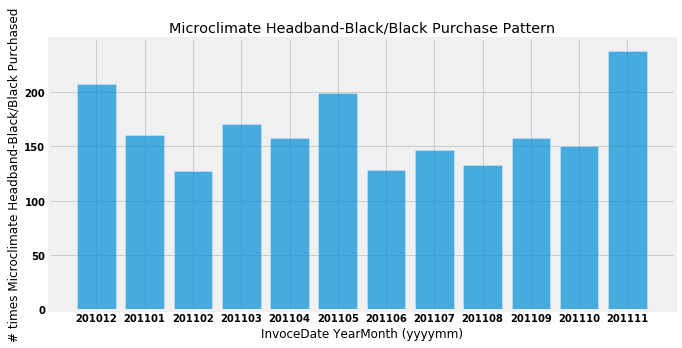

In [82]:
plotMyLineGraph(most_purchase_item_patern.YearMonth.astype(str), most_purchase_item_patern.ItemCode, most_purchased_item_Desc +' Purchase Pattern', 'InvoceDate YearMonth (yyyymm)', '# times '+most_purchased_item_Desc+' Purchased')
plotMyBarGraph(most_purchase_item_patern.YearMonth.astype(str), most_purchase_item_patern.ItemCode, most_purchased_item_Desc +' Purchase Pattern', 'InvoceDate YearMonth (yyyymm)', '# times '+most_purchased_item_Desc+' Purchased')


In [83]:
most_purchase_item_patern['MonthlyGrowth'] = most_purchase_item_patern['ItemCode'].pct_change()
most_purchase_item_patern=most_purchase_item_patern.fillna(0)
most_purchase_item_patern

,YearMonth,ItemCode,MonthlyGrowth
0,201012,207,0.000000
1,201101,160,-0.227053
2,201102,127,-0.206250
3,201103,171,0.346457
4,201104,158,-0.076023
5,201105,199,0.259494
6,201106,128,-0.356784
7,201107,147,0.148438
8,201108,133,-0.095238
9,201109,158,0.187970


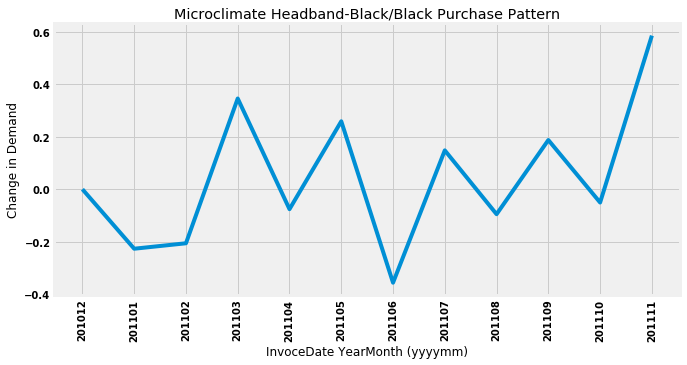

In [84]:
plotMyLineGraph(most_purchase_item_patern.YearMonth.astype(str), most_purchase_item_patern.MonthlyGrowth, most_purchased_item_Desc +' Purchase Pattern', 'InvoceDate YearMonth (yyyymm)', 'Change in Demand')

In [85]:
# Save the final results sets and Churn rate data frames for futther processing 
processedDataFrame.to_csv(data_folder+"/output_files/1-GR-29-Capstone_Customer_Retail_Analytics_Pass-1.csv",index=False)
processedDataFrame.to_csv(data_folder+"/input_files/1-GR-29-Capstone_Customer_Retail_Analytics_Pass-1.csv",index=False)

#  Churn rate data frames 
tx_retention.to_csv(data_folder+"/output_files/1-GR-29-Capstone_Customer_Retail_Analytics_Pass-1-ChurnRate.csv",index=False)
tx_retention.to_csv(data_folder+"/input_files/1-GR-29-Capstone_Customer_Retail_Analytics_Pass-1-ChurnRate.csv",index=False)

In [86]:
print(f'Cleaned data with shape{processedDataFrame.shape}, and data types--\n')
print(processedDataFrame.dtypes)
print(f'\n\n\ntx_retention data with shape{tx_retention.shape}, and data types--\n')
print(tx_retention.dtypes)

Cleaned data with shape(379095, 17), and data types--

InvoiceNo                        int64
ItemCode                         int64
item_Desc                       object
Quantity                         int64
InvoiceDate             datetime64[ns]
UnitPrice                      float64
CustomerID                     float64
CustomerName                    object
Country                         object
year                             int64
month                            int64
day                              int64
YearMonth                        int64
Revenue                        float64
MinPurchaseDate         datetime64[ns]
MinPurchaseYearMonth             int64
UserType                        object
dtype: object



tx_retention data with shape(11, 5), and data types--

YearMonth              int64
TotalUserCount         int64
RetainedUserCount      int64
RetentionRate        float64
ChurnRate            float64
dtype: object



## Customer Segmentation  using RFM analysis - Next step - (recency, frequency, monetary)
2-GR-29-Customer Analytics-CustSegmentationRFM.ipynb